<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Пороговое значение метрики - не менее 0.59. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# импорт моделей
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# импорт инструментов и метрик для исследования
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
иfrom sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

Сохраним файл в переменную df и изучим первые пять строк таблицы.

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Также изучим основную информацию о таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Все столбцы имеют корректный тип данных. В столбце Tenure довольно большое количество пропусков (около 10%). Также названия столбцов не приведены к змеиному регистру. Исправим это.

In [5]:
df = df.rename(columns={
    'RowNumber': 'Row_Number',
    'CustomerId': 'Customer_Id',
    'CreditScore': 'Credit_Score', 
    'NumOfProducts': 'Num_Of_Products', 
    'HasCrCard': 'Has_Cr_Card', 
    'IsActiveMember': 'Is_Active_Member', 
    'EstimatedSalary': 'Estimated_Salary'
    }
)

In [6]:
df.columns = df.columns.str.lower()

Для проверки выведем на экран скорректированные названия столбцов.

In [7]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим наличие дубликатов в таблице по связке customer_id-surname.

In [8]:
df[df.duplicated(subset=['customer_id', 'surname'], keep=False)]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited


Дубликатов нет. Удалим столбцы row_number, customer_id, surname, т.к. в них содержатся уникальные значения и они нам не понадобятся для построения моделей.

In [9]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

Рассмотрим уникальные значения в остальных столбцых и распределение данных в них для выявления аномалий.

In [10]:
df['geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: geography, dtype: float64

In [11]:
df['gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

In [12]:
df['age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [13]:
df['num_of_products'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: num_of_products, dtype: float64

In [14]:
df['has_cr_card'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: has_cr_card, dtype: float64

In [15]:
df['is_active_member'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: is_active_member, dtype: float64

В стобцах geography, gender, age, num_of_products, has_cr_card, is_active_member нет аномальных значений. Распределение данных не вызывает вопросов.

Также взглянем на распределение данных в целевом признаке exited.

In [16]:
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Чуть больше 20% клиентов из нашей выборки ушли из банка. Соответственно, accuracy дефолтной модели, которая для всех клиентов предсказывает, что они не уйдут из банка, составит 0.7963.

Теперь рассмотрим на распределение данных в столбце с пропусками - tenure.

In [17]:
df['tenure'].value_counts(normalize=True)

1.0     0.104719
2.0     0.104499
8.0     0.102629
3.0     0.102079
5.0     0.101969
7.0     0.101749
4.0     0.097349
9.0     0.097019
6.0     0.096909
10.0    0.049060
0.0     0.042020
Name: tenure, dtype: float64

Похоже, что данные распределены нормально. Проверим это с помощью графика.

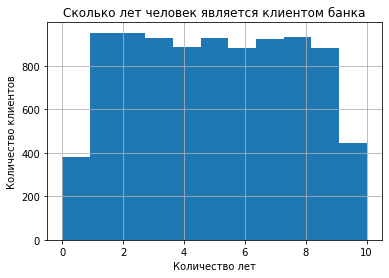

In [18]:
df['tenure'].hist(bins=11)
plt.title('Cколько лет человек является клиентом банка')
plt.xlabel('Количество лет')
plt.ylabel('Количество клиентов')
plt.show()

Также изучим первые 15 строк выборки, где пропущено значение в столбце tenure.

In [19]:
df[df['tenure'].isna()].head(15)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Какие-либо закономерности для пропусков не выявлены. Учитывая, что данные в этом столбце нормально распределены, заменим пропуски случайными значениями от 0 до 10 с учетом веса этих значений в исходном файле.

In [20]:
random_items = df['tenure'].dropna().sample(n=df.shape[0], replace=True, random_state=12345).reset_index(drop=True)
df['tenure'] = df['tenure'].fillna(random_items)

Проверим наличие пропусков в столбце и повторно построим график по значениям столбца, чтобы проверить, что распределение осталось прежним.

In [21]:
df['tenure'].isna().sum()

0

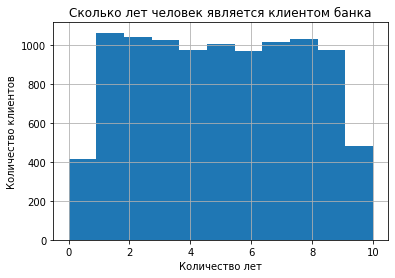

In [22]:
df['tenure'].hist(bins=11)
plt.title('Cколько лет человек является клиентом банка')
plt.xlabel('Количество лет')
plt.ylabel('Количество клиентов')
plt.show()

Преобразуем категориальные признаки в численные с помощью прямого кодирования.

In [23]:
df = pd.get_dummies(df, drop_first=True)

Разделим данные таблицы на признаки и целевой признак.

In [24]:
features = df.drop(['exited'], axis=1)
target = df['exited']

Теперь приведем все количественные признаки к одному масштабу.

In [25]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(features[numeric])
pd.options.mode.chained_assignment = None

Разделим признаки и целевой признак на три выборки - обучающую, валидационную и тестовую.

In [26]:
features_new, features_test, target_new, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target)

In [27]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_new, target_new, test_size=0.25, random_state=12345, stratify=target_new)

Проверим размеры полученных выборок.

In [28]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(6000, 11)

(6000,)

(2000, 11)

(2000,)

(2000, 11)

(2000,)

Данные готовы к исследованию. Приступим к построению моделей.

## Исследование задачи

Ранее мы выявили несбалансированность классов в целевом признаке: количество клиентов, которые ушли из банка, в 4 раза меньше тех, которые остались.

Построим модель, которая по дефолту прогнозирует наиболее часто встречающееся значение целевого признака, т.е. что клиент не уйдет из банка.

In [29]:
model = DummyClassifier(strategy='most_frequent', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

Так как положительные значения данная модель не предсказыват, по ней можно рассчитать только значение accuracy.

In [30]:
accuracy_score(target_valid, predicted_valid)

0.7965

Теперь построим несколько моделей по нашим данным, не балансируя классы, и изучим их метрики.

Для начала создадим функцию, которая будет выводить все необходимые метрики для любой модели.

In [31]:
def metrics(model, features, target, predicted):
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    print('Доля правильных ответов:', accuracy_score(target, predicted))
    print('Точность:', precision_score(target, predicted))
    print('Полнота:', recall_score(target, predicted))
    print('F1-мера:', f1_score(target, predicted))
    print('Матрица ошибок:')
    print(confusion_matrix(target, predicted))
    print('AUC-ROC:', roc_auc_score(target, probabilities_one))
    print('ROC-кривая:')
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

### Логистическая регрессия ###

Построим модель логистической регрессии.

Доля правильных ответов: 0.8185
Точность: 0.671875
Полнота: 0.2113022113022113
F1-мера: 0.3214953271028037
Матрица ошибок:
[[1551   42]
 [ 321   86]]
AUC-ROC: 0.7874978213961265
ROC-кривая:


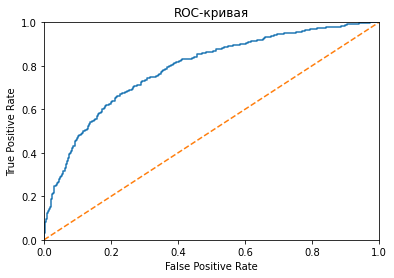

CPU times: user 199 ms, sys: 110 ms, total: 310 ms
Wall time: 314 ms


In [32]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

Значение accuracy совсем немного выше, чем на дефолтной модели. Показатели полноты и f1-меры крайне низкие.

### Дерево решений ###

Посмотрим, какие показатели мы получим с помощью решающего дерева. Сначала подберем наилучшую глубину дерева.

In [33]:
%%time

best_model = None
best_depth = 0
best_accuracy = 0
for depth in range(2, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    accuracy = model.score(features_valid, target_valid)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_depth = depth

CPU times: user 159 ms, sys: 400 µs, total: 160 ms
Wall time: 164 ms


In [34]:
print(best_accuracy)
print(best_depth)

0.855
7


Теперь построим модель с глубиной дерева равной 7 и изучим метрики.

Доля правильных ответов: 0.855
Точность: 0.7489361702127659
Полнота: 0.43243243243243246
F1-мера: 0.5482866043613708
Матрица ошибок:
[[1534   59]
 [ 231  176]]
AUC-ROC: 0.8309997208302294
ROC-кривая:


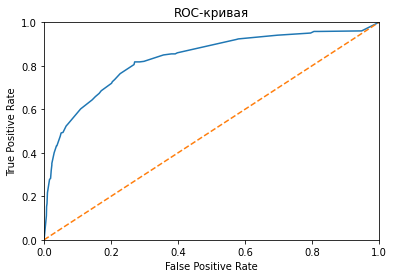

CPU times: user 119 ms, sys: 20 ms, total: 139 ms
Wall time: 142 ms


In [35]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

При использовании решающего дерева значение всех метрик выросло, особенно полнота и f1-мера.

### Случайный лес ###

Перейдем к случайному лесу. Как и в случае решающего дерева, сначала подберем оптимальные гиперпараметры.

In [36]:
%%time

best_model = None
best_depth = 0
best_est = 0
best_accuracy = 0
for est in range(10, 200, 10):
    for depth in range(2, 12):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, n_jobs=-1)
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_depth = depth
            best_est = est

CPU times: user 1min 16s, sys: 366 ms, total: 1min 16s
Wall time: 1min 16s


In [37]:
print(best_accuracy)
print(best_depth)
print(best_est)

0.865
10
120


Доля правильных ответов: 0.865
Точность: 0.8374384236453202
Полнота: 0.4176904176904177
F1-мера: 0.5573770491803278
Матрица ошибок:
[[1560   33]
 [ 237  170]]
AUC-ROC: 0.871745397169126
ROC-кривая:


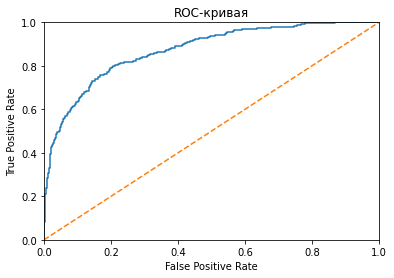

CPU times: user 780 ms, sys: 11.9 ms, total: 792 ms
Wall time: 797 ms


In [38]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

При использование случайного леса все метрики, кроме полноты, немного повысились по сравнению с решающим деревом. Однако значение f1-меры по-прежнему не достигает целевого 0.59.

Попробуем повысить значения метрик путем балансировки классов. В дальнейшем исследовании возьмем за основу модель случайного леса с подобранными гиперпараметрами: глубина 10 и количество деревьев 120.

## Борьба с дисбалансом

### Взвешивание классов ###

В первую очередь попробуем метод взвешивания классов при построении модели.

Доля правильных ответов: 0.847
Точность: 0.6188235294117647
Полнота: 0.6461916461916462
F1-мера: 0.6322115384615384
Матрица ошибок:
[[1431  162]
 [ 144  263]]
AUC-ROC: 0.8688966316084958
ROC-кривая:


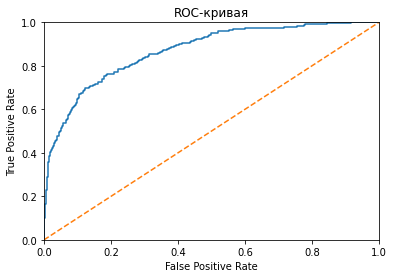

CPU times: user 766 ms, sys: 3.93 ms, total: 770 ms
Wall time: 779 ms


In [39]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

Взвешивание классов помогло повысить f1-меру до 0.63. До балансировки классов такого значения достичь не удавалось.

### Увеличение выборки ###

Теперь приведем классы к одинаковому размеру путем увеличения класса, в котором содержится меньше объектов (клиенты, которые ушли из банка).

In [40]:
features_upsampled = pd.concat([features_train[target_train == 0]] + [features_train[target_train == 1]] * 4)
target_upsampled = pd.concat([target_train[target_train == 0]] + [target_train[target_train == 1]] * 4)
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

Доля правильных ответов: 0.829
Точность: 0.5623800383877159
Полнота: 0.7199017199017199
F1-мера: 0.6314655172413792
Матрица ошибок:
[[1365  228]
 [ 114  293]]
AUC-ROC: 0.869188140374581
ROC-кривая:


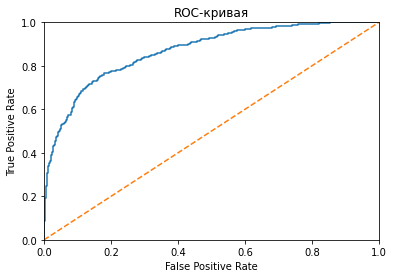

CPU times: user 976 ms, sys: 11.9 ms, total: 988 ms
Wall time: 1 s


In [41]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

В данном случае значение f1-меры немного ниже, чем при взвещивании классов, а значение AUC-ROC немного выше.

### Уменьшение выборки ###

Теперь попробуем уменьшить класс, в котором меньше объектов, чтобы привести классы к одному размеру.

In [42]:
features_downsampled = pd.concat(
    [features_train[target_train == 0].sample(frac=0.25, random_state=12345)] + [features_train[target_train == 1]])
target_downsampled = pd.concat(
    [target_train[target_train == 0].sample(frac=0.25, random_state=12345)] + [target_train[target_train == 1]])
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

Доля правильных ответов: 0.8015
Точность: 0.5082236842105263
Полнота: 0.7592137592137592
F1-мера: 0.6088669950738917
Матрица ошибок:
[[1294  299]
 [  98  309]]
AUC-ROC: 0.8700534124262937
ROC-кривая:


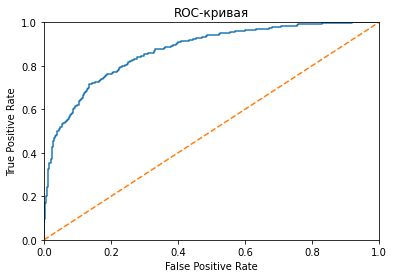

CPU times: user 498 ms, sys: 7.97 ms, total: 506 ms
Wall time: 508 ms


In [43]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
metrics(model, features_valid, target_valid, predicted_valid)

Несмотря на увеличение метрики AUC-ROC, f1-мера заметно снизилась.

### Изменение порога ###

Теперь попробуем снизить порог классификации, проверим значения точности, полноты и f1-меры для значений порога от 0.1 до 0.5 с шагом 0.02.

In [44]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0.1, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.10 | Точность = 0.325, Полнота = 0.936, F1-мера = 0.482
Порог = 0.12 | Точность = 0.354, Полнота = 0.904, F1-мера = 0.509
Порог = 0.14 | Точность = 0.379, Полнота = 0.865, F1-мера = 0.527
Порог = 0.16 | Точность = 0.413, Полнота = 0.843, F1-мера = 0.554
Порог = 0.18 | Точность = 0.451, Полнота = 0.816, F1-мера = 0.581
Порог = 0.20 | Точность = 0.491, Полнота = 0.803, F1-мера = 0.610
Порог = 0.22 | Точность = 0.515, Полнота = 0.762, F1-мера = 0.614
Порог = 0.24 | Точность = 0.552, Полнота = 0.740, F1-мера = 0.632
Порог = 0.26 | Точность = 0.569, Полнота = 0.708, F1-мера = 0.631
Порог = 0.28 | Точность = 0.591, Полнота = 0.673, F1-мера = 0.629
Порог = 0.30 | Точность = 0.609, Полнота = 0.651, F1-мера = 0.629
Порог = 0.32 | Точность = 0.642, Полнота = 0.612, F1-мера = 0.626
Порог = 0.34 | Точность = 0.671, Полнота = 0.587, F1-мера = 0.626
Порог = 0.36 | Точность = 0.699, Полнота = 0.560, F1-мера = 0.622
Порог = 0.38 | Точность = 0.723, Полнота = 0.526, F1-мера = 0.609
Порог = 0.

Наилучшее значение f1-меры получается при значении порога 0.24. Построим модель с этим значением порога и рассмотрим все ее метрики.

Доля правильных ответов: 0.825
Точность: 0.5522935779816514
Полнота: 0.7395577395577395
F1-мера: 0.6323529411764706
Матрица ошибок:
[[1349  244]
 [ 106  301]]
AUC-ROC: 0.871745397169126
ROC-кривая:


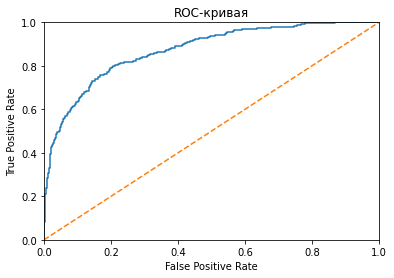

CPU times: user 780 ms, sys: 3.98 ms, total: 784 ms
Wall time: 797 ms


In [45]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.24
metrics(model, features_valid, target_valid, predicted_valid)

У данной модели самые высокие значения f1-меры и AUC-ROC.

Таким образом самые высокие метрики качества показывается модель случайного леса с глубиной дерева 10 и количеством деревьев 120 при снижении порога классификации до 0.24.

Проверим нашу модель на тестовой выборке.

## Тестирование модели

Доля правильных ответов: 0.8285
Точность: 0.5588235294117647
Полнота: 0.7469287469287469
F1-мера: 0.6393270241850684
Матрица ошибок:
[[1353  240]
 [ 103  304]]
AUC-ROC: 0.8729052627357712
ROC-кривая:


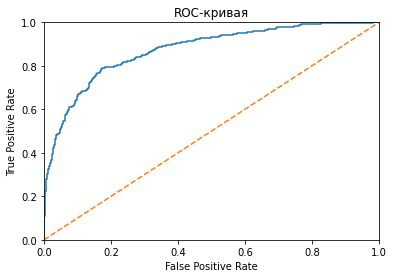

CPU times: user 750 ms, sys: 12 ms, total: 762 ms
Wall time: 769 ms


In [46]:
%%time

model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10, n_jobs=-1)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.24
metrics(model, features_test, target_test, predicted_test)

На тестовой выборке удалось достичь максимального значения f1-меры почти 0.64 и значения AUC-ROC 0.87.